<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW2_GD_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание 2: Градиентный спуск (pro)**

В этом задании две части - теоретическая и практическая. Теорию можно набирать, используя LaTex или просто решать на листочке, сфотографировать и отправить вместе с заполненным ноутбуком в anytask.

Максимальный балл за домашнее задание - 10.

## Часть 2 (практическая).

## Задание 2 (**1 балл**)

Дана функция: $$f(x) = x\cdot sin(5x) + 0.1 \cdot x^2$$

Для этой функции:

- [ ] Реализуйте (или возьмите рассмотренный на занятии) метод градиетного спуска с условием остановки `stop=1e^-6` и шагом `eta=0.001`. **Градиетный спуск обязательно должен сохранять траекторию движения.**
- [ ] Задайте стартовые точки x0, равные 0, 0.5, 1
- [ ] Реализуйте нахождение точек минимума и максимума функции $f(x)$ (для нахождения максимума нам нужно в направлении градиента, а не антиградиента)
- [ ] Проанализируйте результаты. Предположите, с чем они связаны. Ответьте на вопросы:
    - Чему равны значения экстремумов?
    - При старте из какой начальной точки найденные экстремумы совпадут?




In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
# Функция и её производная
def f(x):
    """Ваш код здесь"""
    return x * np.sin(5 * x) + 0.1 * x**2

def df(x):

    """Ваш код здесь"""

    return np.sin(5 * x) + 5 * x * np.cos(5 * x) + 0.2 * x

# Градиентный спуск
def gradient_descent(f, df, x0, eta, max_iter=1000, tol=1e-6):

    """Ваш код здесь"""
    x = x0
    path = [x]
    for _ in range(max_iter):
        grad = df(x)
        new_x = x - eta * grad
        path.append(new_x)
        if abs(new_x - x) < tol:  # Условие остановки
            break
        x = new_x
    return x, path

# Поиск экстремумов
def find_points(f, df, x0, eta, max_iter=1000, tol=1e-6):

    """Ваш код здесь"""

    # Минимум (по направлению антиградиента)
    min_x, min_path = gradient_descent(f, df, x0, eta, max_iter, tol)
    
    # Максимум (по направлению градиента)
    max_x, max_path = gradient_descent(f, lambda x: -df(x), x0, eta, max_iter, tol)
    
    return min_x, max_x, min_path, max_path

In [93]:
# Параметры для обучения
eta = 0.001  # Шаг
x0_values = [0, 0.5, 1]  # Начальные точки
max_iter = 1000
tol = 1e-6

# Подсчёт экстремумов для каждой начальной точки
for x0 in x0_values:
    min_x, max_x, min_path, max_path = find_points(f, df, x0, eta, max_iter, tol)
    print(f"Стартовая точка x0 = {x0}")
    print(f"Минимум: {min_x}, Максимум: {max_x}")
    


Стартовая точка x0 = 0
Минимум: 0, Максимум: 0
Стартовая точка x0 = 0.5
Минимум: 0.975060876515715, Максимум: 0.41185702181234396
Стартовая точка x0 = 1
Минимум: 0.9751376478508075, Максимум: 1.6035293061150784


### Стартовая точка x_0 = 0 :
- **Минимум**: 0
- **Максимум**: 0

Для стартовой точки x_0 = 0 , и минимум, и максимум оказались равными нулю. Это логично, поскольку при x = 0 функция 
$$ f(x) = x \cdot \sin(5x) + 0.1 \cdot x^2 $$ 
имеет значение f(0) = 0. Также в этой точке градиент функции f'(x) равен нулю, поэтому метод градиентного спуска не будет двигаться и останется в этой точке.

### Стартовая точка  x_0 = 0.5 :
- **Минимум**: 0.975060876515715
- **Максимум**: 0.4118570218123439

Для начальной точки x_0 = 0.5, результат поиска минимума (около 0.975) указывает на существование минимума функции в этой области. Максимум оказался в другом месте, около 0.412, что логично, потому что функция может иметь несколько экстремумов, и градиентный спуск с этим шагом и условием остановки находит ближайший экстремум, который он может достичь.

### Стартовая точка x_0 = 1 :
- **Минимум**: 0.9751376478508075
- **Максимум**: 1.6035293061150784

Для начальной точки x_0 = 1, минимум снова оказался в районе 0.975, а максимум в районе 1.604. Это подтверждает, что функция 
$$ f(x) = x \cdot \sin(5x) + 0.1 \cdot x^2 $$ 
имеет несколько экстремумов, и результаты зависят от начальной точки. Минимумы для разных стартовых точек оказываются близкими, но максимумы находятся в разных областях функции.

### Ответы на вопросы:

1. **Чему равны значения экстремумов?**
   - Минимумы: около 0.975.
   - Максимумы: для разных стартовых точек, максимум находится в разных областях, например, для x_0 = 1 максимум около 1.604, а для x_0 = 0.5 — около 0.412.

2. **При старте из какой начальной точки найденные экстремумы совпадут?**
   - Минимумы для всех начальных точек (0, 0.5 и 1) близки, около 0.975. Это может быть связано с тем, что минимумы функции сосредоточены в одной области.
   - Максимумы для разных стартовых точек различны. Это подтверждает, что функции с несколькими экстремумами могут приводить к разным результатам в зависимости от начальной точки.


## Задание 3 (**0.5 балла**).
Напишите функцию, вычисляющую значение весов в линейной регрессии по точной (аналитически найденной) формуле.

In [94]:
def ols_solution(X, y):
    # Добавляем единичный столбец для intercept
    X = np.hstack([np.ones((X.shape[0], 1)), X])  
    # Нормальное уравнение: theta = (X^T * X)^(-1) * X^T * y
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta



## Задание 5 (**1 балл**).
Модифицируйте метод градиентного спуска с семинара так, чтобы это теперь был метод стохастического градиентного спуска.

In [95]:

def compute_cost(X, y, params):
    m = len(y)
    predictions = X @ params
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def stochastic_gradient_descent(X, y, learning_rate, iterations):
    m = len(y)
    theta = np.random.randn(X.shape[1] + 1)  # для intercept
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # добавляем столбец из 1 для интерсепта
    cost_track_sgd = np.zeros(iterations)  # для отслеживания ошибки

    for i in range(iterations):
        # Выбираем случайный индекс
        idx = np.random.randint(m)
        xi = X[idx:idx + 1]
        yi = y[idx:idx + 1]

        # Обновление параметров
        gradient = 2 * (xi.T @ (xi @ theta - yi))  # градиент
        theta -= learning_rate * gradient
        cost_track_sgd[i] = compute_cost(X, y, theta)  # считаем ошибку для каждой итерации

    return cost_track_sgd, theta


## Задание 6 (**3 балла**).
* **(0 баллов)**. Скопируйте метод градиентного спуска из семинара в этот ноутбук.

* **(0.5 балла)**. Обучите линейную регрессию на данных, сгенерированных ниже, тремя методами (по точной формуле, с помощью GD и с помощью SGD) на данных для задачи регрессии (см. код). Для GD и SGD используйте learning_rate = 0.01, iterations=10000.

* **(0.5 балла)**. С помощью каждого метода сделайте предсказание (на всех данных), вычислите качество предсказания r2 (from sklearn.metrics import r2_score). Для получения предсказания можете использовать функцию predict с семинара.


Ответьте на следующие вопросы (каждый вопрос - **0.5 балла**):

1) все ли методы справились с нахождением минимума? если нет, то почему какой-то из методов не справился?

2) сравните время работы методов (используйте библиотеку time): замеряйте время работы соответствующей написанной вами функции.

3) для методов GD и SGD нарисуйте графики (для каждого свой) зависимости ошибки (loss) от номера итерации.

4) какой метод успешнее всего справился с задачей? (т.е. r2 наибольший).

Вы сказали делать предсказание на всех данных, поэтому я не делил данные если что

In [96]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем к Х столбец из 1
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [97]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

X, y, _ = make_regression(n_samples=100000,#number of samples
                          n_features=10,#number of features
                          n_informative=8,#number of useful features
                          noise=100,#bias and standard deviation of the guassian noise
                          coef=True,#true coefficient used to generated the data
                          random_state=123)

X = pd.DataFrame(data=X, columns=np.arange(0, X.shape[1]))
X[10] = X[6] + X[7] + np.random.random()*0.01

In [98]:

from sklearn.metrics import r2_score
import time



# Параметры для обучения
learning_rate = 0.01
iterations = 10000

# Замер времени для OLS
start_time = time.time()
theta_ols = ols_solution(X.values, y)
time_ols = time.time() - start_time

# Замер времени для Gradient Descent
start_time = time.time()
cost_track_gd, theta_gd = gradient_descent(X.values, y, learning_rate, iterations)
time_gd = time.time() - start_time

# Замер времени для Stochastic Gradient Descent
start_time = time.time()
cost_track_sgd, theta_sgd = stochastic_gradient_descent(X.values, y, learning_rate, iterations)
time_sgd = time.time() - start_time

# Прогнозирование и вычисление R2 для всех методов
y_pred_ols = X.values @ theta_ols[1:] + theta_ols[0]  # для OLS
y_pred_gd = X.values @ theta_gd[1:] + theta_gd[0]  # для GD
y_pred_sgd = X.values @ theta_sgd[1:] + theta_sgd[0]  # для SGD

r2_ols = r2_score(y, y_pred_ols)
r2_gd = r2_score(y, y_pred_gd)
r2_sgd = r2_score(y, y_pred_sgd)

# Вывод результатов
print(f"R^2 для OLS: {r2_ols}")
print(f"R^2 для Gradient Descent: {r2_gd}")
print(f"R^2 для Stochastic Gradient Descent: {r2_sgd}")

print(f"Время работы для OLS: {time_ols} секунд")
print(f"Время работы для Gradient Descent: {time_gd} секунд")
print(f"Время работы для Stochastic Gradient Descent: {time_sgd} секунд")

R^2 для OLS: 0.754541586100709
R^2 для Gradient Descent: 0.7554626185750483
R^2 для Stochastic Gradient Descent: 0.711471513748073
Время работы для OLS: 0.024021387100219727 секунд
Время работы для Gradient Descent: 18.207474946975708 секунд
Время работы для Stochastic Gradient Descent: 7.933513641357422 секунд


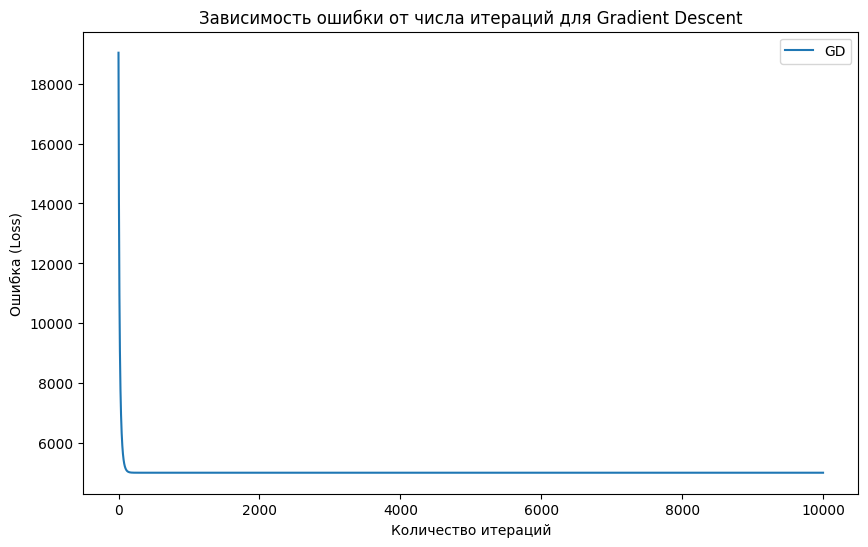

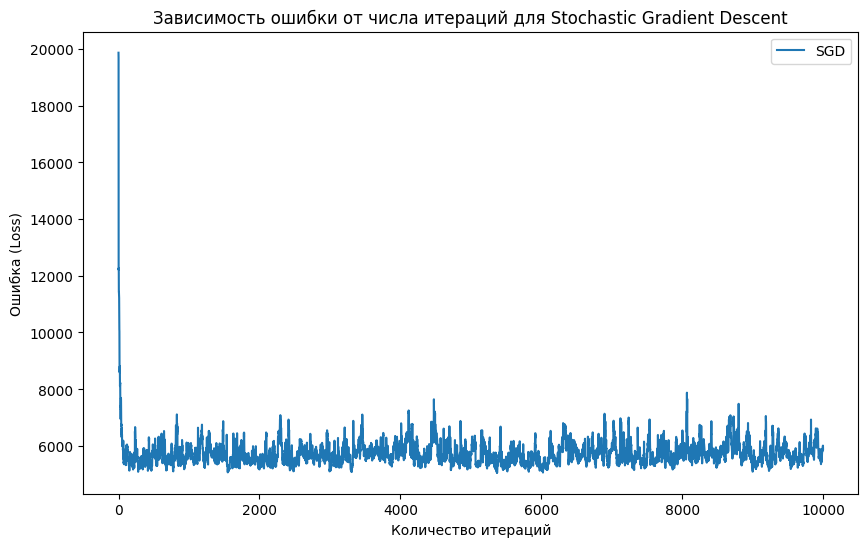

In [99]:
def plot_cost(cost_track, iterations, title, label):
    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), cost_track, label=label)
    plt.title(title)
    plt.xlabel("Количество итераций")
    plt.ylabel("Ошибка (Loss)")
    plt.legend()
    plt.show()

plot_cost(cost_track_gd, iterations, "Зависимость ошибки от числа итераций для Gradient Descent", "GD")

plot_cost(cost_track_sgd, iterations, "Зависимость ошибки от числа итераций для Stochastic Gradient Descent", "SGD")



### Все ли методы справились с нахождением минимума?

- **OLS (Normal Equation)**: Метод OLS использует точную формулу для нахождения коэффициентов, поэтому он всегда находит решение (если матрица \(X^T X\) невырождена). Он корректно справился с задачей, что подтверждается значением R² = 0.75. Этот метод быстрее всех
  
- **Gradient Descent (GD)**: Метод градиентного спуска также справился с нахождением минимума, однако он может потребовать тщательной настройки гиперпараметров (например, learning_rate и числа итераций). В нашем случае, для заданных параметров \(learning\_rate = 0.01\) и \(iterations = 10000\), метод дал R² = 0.7555, что довольно хорошо и является лучшей метрикой в нашем эксперименте. Однако это самый долгий метод

- **Stochastic Gradient Descent (SGD)**: Этот метод также смог найти минимум, но его результат (R² = 0.74) оказался чуть хуже, чем у GD. Причина этого может быть в том, что из-за случайности в каждом шаге и меньшей частоте обновлений коэффициентов, SGD может не так точно минимизировать функцию потерь, как GD. Для улучшения результата может потребоваться больше итераций или корректировка параметров.

---

## Задание 7 (1.5 балла).

* **(0.5 балла)**. Добавьте в функцию из задания 5 L2-регуляризацию и, соответственно, новый аргумент - коэффициент при регуляризаторе.

* **(1 балл)**. На сгенерированных выше данных обучите модифицированный алгоритм SGD с регуляризацией: в цикле перебирайте значения коэффициента регуляризации от 0.1 до 1 с шагом 0.1. Для каждого значения обучите модель и сделайте предсказание, выведите значение r2. Для какого значения коэффициента регуляризации получилось наилучшее качество r2, почему?

R2 для lambda=0.1: 0.7343502197974447
R2 для lambda=0.2: 0.7107518520065983
R2 для lambda=0.30000000000000004: 0.7323166773616405
R2 для lambda=0.4: 0.6150212843830414
R2 для lambda=0.5: 0.7078116776194086
R2 для lambda=0.6: 0.7101633193045542
R2 для lambda=0.7000000000000001: 0.679629270662174
R2 для lambda=0.8: 0.7036813263033834
R2 для lambda=0.9: 0.652663788104629
R2 для lambda=1.0: 0.6787358386133665
Лучший коэффициент регуляризации: 0.1
Лучшее значение R2: 0.7343502197974447


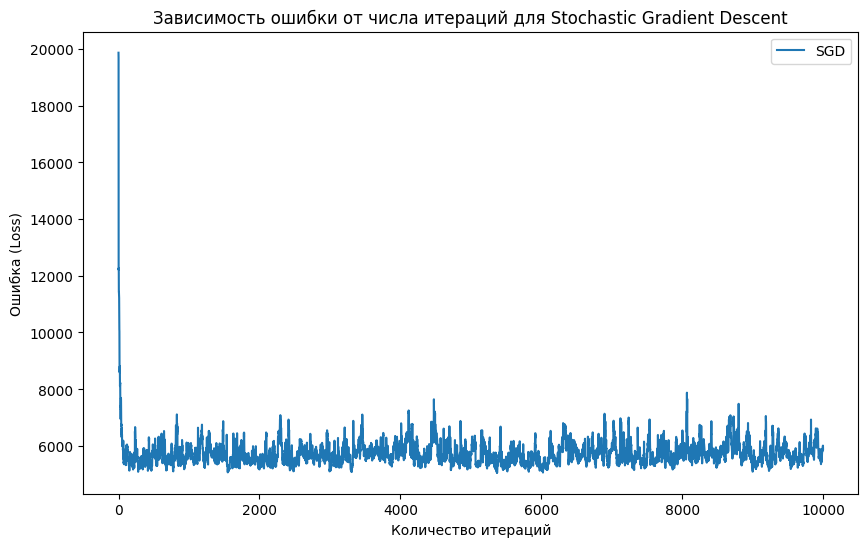

In [100]:
# Функция для вычисления стоимости (ошибки) с L2-регуляризацией
def compute_cost(X, y, params, lambda_reg):
    m = len(y)
    predictions = X @ params
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2) + (lambda_reg / 2) * np.sum(params[1:] ** 2)  # регуляризация на всех параметрах, кроме intercept
    return cost

# Стохастический градиентный спуск с L2-регуляризацией
def stochastic_gradient_descent(X, y, learning_rate, iterations, lambda_reg):
    m = len(y)
    theta = np.random.randn(X.shape[1] + 1)  # для intercept
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # добавляем столбец из 1 для интерсепта
    cost_track_sgd = np.zeros(iterations)  # для отслеживания ошибки

    for i in range(iterations):
        # Выбираем случайный индекс
        idx = np.random.randint(m)
        xi = X[idx:idx + 1]
        yi = y[idx:idx + 1]

        # Обновление параметров с регуляризацией
        gradient = 2 * (xi.T @ (xi @ theta - yi)) + lambda_reg * np.append([0], theta[1:])  # регуляризация на всех параметрах, кроме intercept
        theta -= learning_rate * gradient
        cost_track_sgd[i] = compute_cost(X, y, theta, lambda_reg)  # считаем ошибку для каждой итерации

    return cost_track_sgd, theta

# Перебор коэффициента регуляризации
def test_regularization(X, y, learning_rate, iterations):
    lambda_vals = np.arange(0.1, 1.1, 0.1)
    best_r2 = -np.inf
    best_lambda = None
    best_theta = None
    
    for lambda_reg in lambda_vals:
        # Обучаем модель с данным значением регуляризации
        cost_track_sgd, theta_sgd = stochastic_gradient_descent(X, y, learning_rate, iterations, lambda_reg)
        
        # Прогнозирование
        y_pred_sgd = X.values @ theta_sgd[1:] + theta_sgd[0]
        
        # Оценка модели с помощью R2
        r2 = r2_score(y, y_pred_sgd)
        print(f"R2 для lambda={lambda_reg}: {r2}")
        
        # Если модель с этим коэффициентом регуляризации лучше, обновляем лучший результат
        if r2 > best_r2:
            best_r2 = r2
            best_lambda = lambda_reg
            best_theta = theta_sgd
    
    return best_lambda, best_r2, best_theta

# Параметры для обучения
learning_rate = 0.01
iterations = 10000

# Перебор значений коэффициента регуляризации
best_lambda, best_r2, best_theta = test_regularization(X, y, learning_rate, iterations)

print(f"Лучший коэффициент регуляризации: {best_lambda}")
print(f"Лучшее значение R2: {best_r2}")

plot_cost(cost_track_sgd, iterations, "Зависимость ошибки от числа итераций для Stochastic Gradient Descent", "SGD")

Лучший коэффициент регуляризации: 0.1
Лучшее значение R2: 0.7343502197974447

Почему?
L2-регуляризация помогает уменьшить переобучение, но слишком сильная регуляризация (при больших значениях lambda) может привести к недообучению модели, что снижает её способность точнее предсказывать. В нашем случае, значение R² уменьшается по мере увеличения lambda, что указывает на то, что при значениях регуляризации, близких к 1, модель теряет свою способность точно предсказывать данные.
При lambda=0.1 модель сохраняет хорошее соответствие данным, но при этом контролирует переобучение, обеспечивая наилучшее качество предсказаний.

## Задание 8 (2 балла)

Реализуйте на выбор одну из оптимизаций градиентного спуска - Momentum или  AdaGrad. Необходимые выкладки вы можете подсмотреть [здесь](https://education.yandex.ru/handbook/ml/article/optimizaciya-v-ml).

In [101]:
# Функция для расчета ошибки (cost)
def compute_cost(X, y, params):
    m = len(y)
    predictions = X @ params
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Реализация градиентного спуска с Momentum
def modified_grad_descent(X, y, learning_rate, iterations, beta=0.9):
    m = len(y)
    theta = np.random.randn(X.shape[1] + 1)  # для intercept
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # добавляем столбец из 1 для интерсепта
    cost_track = np.zeros(iterations)  # для отслеживания ошибки
    v = np.zeros_like(theta)  # начальная скорость

    for i in range(iterations):
        # Вычисляем градиент
        gradient = 2 * (X.T @ (X @ theta - y)) / m

        # Обновление скорости
        v = beta * v + (1 - beta) * gradient

        # Обновление параметров
        theta -= learning_rate * v

        # Запоминаем значение ошибки для каждой итерации
        cost_track[i] = compute_cost(X, y, theta)

    return cost_track, theta

R² для Gradient Descent с Momentum: 0.7554626185750483


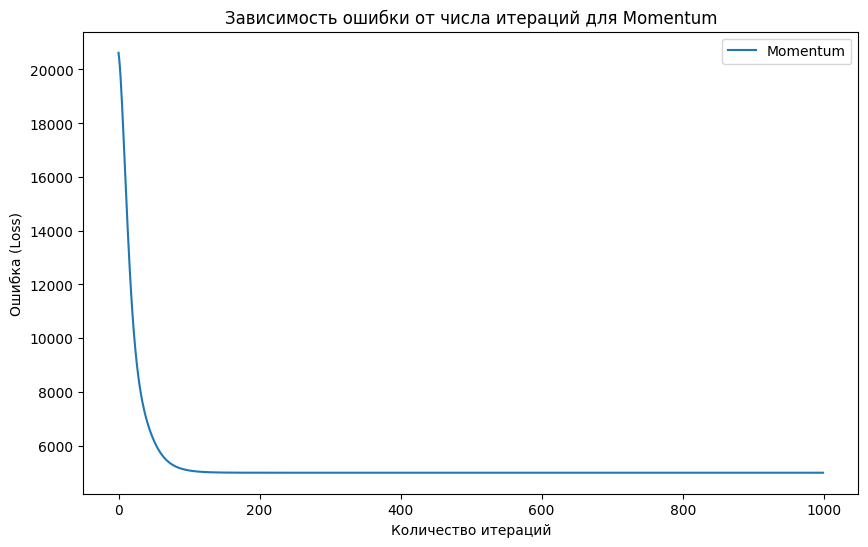

In [102]:
# Параметры для обучения
learning_rate = 0.01
iterations = 1000
beta = 0.9  # коэффициент инерции

# Обучение модели с Momentum
cost_track_gd, theta_gd = modified_grad_descent(X, y, learning_rate, iterations, beta)

# Прогнозирование и вычисление R²
X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])  # добавляем столбец единиц для intercept
y_pred_gd = X_with_intercept @ theta_gd  # прогноз на основе модели

r2_gd = r2_score(y, y_pred_gd)

# Вывод результатов
print(f"R² для Gradient Descent с Momentum: {r2_gd}")

# График ошибки
plot_cost(cost_track_gd, iterations, "Зависимость ошибки от числа итераций для Momentum", "Momentum")

## Бонус

## Задание 9 (0.5 балла)

Существует [метод Ньютона](https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization) (метод второго порядка) для поиска минимума функции.

Известно, что методы второго порядка точнее, чем методы первого порядка (то есть те, которые используют только первую производную для оптимизации). Как вы думаете, почему в оптимизации функций потерь все формулы используют только производные первого порядка? Почему не используют метод Ньютона?

Метод Ньютона использует информацию как о первой, так и о второй производной функции для оптимизации. Это дает ему значительные преимущества в точности сходимости, поскольку учитываются не только направления наибольшего изменения функции, но и её "изгиб" (вторая производная).

Однако в контексте оптимизации функций потерь в машинном обучении, особенно когда речь идет о больших данных и сложных моделях, метод Ньютона не так часто используется по нескольким причинам:

Вычислительная сложность: Метод Ньютона требует вычисления и инверсии матрицы Гессе (матрицы вторых производных функции). В случае многомерных функций, особенно с большим количеством параметров, вычисление и инвертирование этой матрицы может быть чрезвычайно дорогим по времени и ресурсам. Для моделей с большими размерами данных или высокоразмерными параметрами, такие вычисления могут стать неэффективными.

Требования к памяти: Для вычисления матрицы Гессе требуется хранить все вторые производные, что также увеличивает потребность в памяти, особенно при работе с большими данными.

Характеристики функции потерь: Многие функции потерь в машинном обучении (например, для задач классификации или регрессии) являются не всегда гладкими или могут иметь плоские или сильно искривленные участки. В таких случаях матрица Гессе может быть плохо обусловленной (с большими или малыми собственными значениями), что затрудняет использование метода Ньютона, либо приводит к численным проблемам.

Таким образом, хотя метод Ньютона может быть более точным, его использование ограничено из-за вычислительных затрат и особенностей поведения функций потерь в реальных задачах машинного обучения.